In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')

In [3]:
p_info = products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [4]:
duplicate_rows_P = products[products.duplicated()]
duplicate_rows_P

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
76394,Snacks,Candy,Gum,NaN,THE HERSHEY COMPANY,ICE BREAKERS,3498507.0
87568,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811.0
91710,Health & Wellness,Skin Care,NaN,NaN,"BEIERSDORF, INC.",COPPERTONE,NaN
100470,Snacks,Candy,Confection Candy,NaN,"LIDL US, LLC",LIDL,20744731.0
109639,Restaurant,Beverages,Soda,Diet Soda,PEPSICO,PEPSI,NaN
...,...,...,...,...,...,...,...
827242,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3423905.0
833620,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,NaN
834874,Snacks,Nuts & Seeds,Peanuts,NaN,NaN,NaN,3415207.0
838643,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,REESE'S,3473108.0


In [5]:
#Dropping duplicates
products_cleaned = products.drop_duplicates()

In [6]:
products_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845337 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845226 non-null  object 
 1   CATEGORY_2    843915 non-null  object 
 2   CATEGORY_3    784774 non-null  object 
 3   CATEGORY_4    67453 non-null   object 
 4   MANUFACTURER  618873 non-null  object 
 5   BRAND         618875 non-null  object 
 6   BARCODE       841369 non-null  float64
dtypes: float64(1), object(6)
memory usage: 51.6+ MB


In [7]:
null_barcode = products_cleaned[products_cleaned['BARCODE'].isnull()]


In [8]:
products_cleaned = products_cleaned.dropna(subset=['BARCODE'])

In [9]:
products_cleaned

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [10]:
#changing datatype of barcode to str
products_cleaned['BARCODE'] = products_cleaned['BARCODE'].apply(lambda x: str(int(x)))

In [11]:
#Checking max length of barcode
barcode_lengths = products_cleaned['BARCODE'].apply(lambda x: len(str(x)))
barcode_lengths.max()

14

In [12]:
#appending leading 0s to make barcodes uniform
products_cleaned['BARCODE'] = products_cleaned['BARCODE'].apply(lambda x: x.zfill(14))

In [13]:
products_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841369 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    841258 non-null  object
 1   CATEGORY_2    840708 non-null  object
 2   CATEGORY_3    782655 non-null  object
 3   CATEGORY_4    67234 non-null   object
 4   MANUFACTURER  615152 non-null  object
 5   BRAND         615154 non-null  object
 6   BARCODE       841369 non-null  object
dtypes: object(7)
memory usage: 51.4+ MB


In [14]:
#Checking if all barcodes are unique
products_cleaned.shape[0] == products_cleaned['BARCODE'].nunique()

False

In [15]:
 products_cleaned['BARCODE'].nunique() - products_cleaned.shape[0]

-27

In [16]:
#finding barcodes which are duplicated
duplicate_barcodes = products_cleaned['BARCODE'][products_cleaned['BARCODE'].duplicated(keep=False)]



In [17]:
rows_with_duplicate_barcodes = products_cleaned[products_cleaned['BARCODE'].isin(duplicate_barcodes)]

In [18]:
#Viewing duplicated rows to understand differences between products 
rows_with_duplicate_barcodes.sort_values(by='BARCODE')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,00000000404310
139121,Snacks,Candy,Chocolate Candy,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,00000000404310
610681,Snacks,Nuts & Seeds,Snack Seeds,NaN,SUNRIDGE FARMS,SUNRIDGE FARMS,00000000701983
645266,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,00000000701983
681268,Snacks,Nuts & Seeds,Almonds,NaN,TRADER JOE'S,TRADER JOE'S,00000000969307
171015,Snacks,Nuts & Seeds,Covered Nuts,NaN,TRADER JOE'S,TRADER JOE'S,00000000969307
428256,Health & Wellness,Skin Care,Facial Lotion & Moisturizer,NaN,"R.M. PALMER COMPANY, LLC",PALMER,00000001018158
123194,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,00000001018158
36017,Snacks,Candy,Candy Variety Pack,NaN,THE HERSHEY COMPANY,HERSHEY'S,00000003422007
422809,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,00000003422007


In [19]:
#After assessing the data there is no determerinstinc factor to resolve duplicated barcodes, hence removing to maintain data integrity
products_cleaned = products_cleaned[~products_cleaned['BARCODE'].isin(duplicate_barcodes)]

In [20]:
#confirming all duplicated barcodes are removed
products_cleaned['BARCODE'].nunique() - products_cleaned.shape[0]

0

In [21]:
#Check for non digit characters in barcodes
non_digit_barcodes_prod = products_cleaned['BARCODE'][~products_cleaned['BARCODE'].str.isdigit()]

In [22]:
non_digit_barcodes_prod

Series([], Name: BARCODE, dtype: object)

In [23]:
#Viewing % of missing values of all columns to understand the sanity of each column 
#Category 4 is extremely parse and is not the best value to assess any trends
#Manufacturer and Brand also have ~27% of the data missing, need to assess the impact of this when combined with transaction data
missing_values = products_cleaned.isnull().sum().to_frame(name='Missing Count')
missing_values['Missing Percentage'] = (missing_values['Missing Count'] / len(products_cleaned)) * 100
missing_values.round(2)

,Missing Count,Missing Percentage
CATEGORY_1,111,0.01
CATEGORY_2,661,0.08
CATEGORY_3,58712,6.98
CATEGORY_4,774085,92.01
MANUFACTURER,226212,26.89
BRAND,226210,26.89
BARCODE,0,0.00


In [24]:
#Upon viewing the duplicate values, noticed values like "BRAND NOT KNOWN" and "PLACEHOLDER MANUFACTURER"
# Viewing no of occurences in the products dimension to get a feel of how many products are associated with them. 
top_20_brands = products_cleaned['BRAND'].value_counts().head(20)
top_20_manufacturers = products_cleaned['MANUFACTURER'].value_counts().head(20)

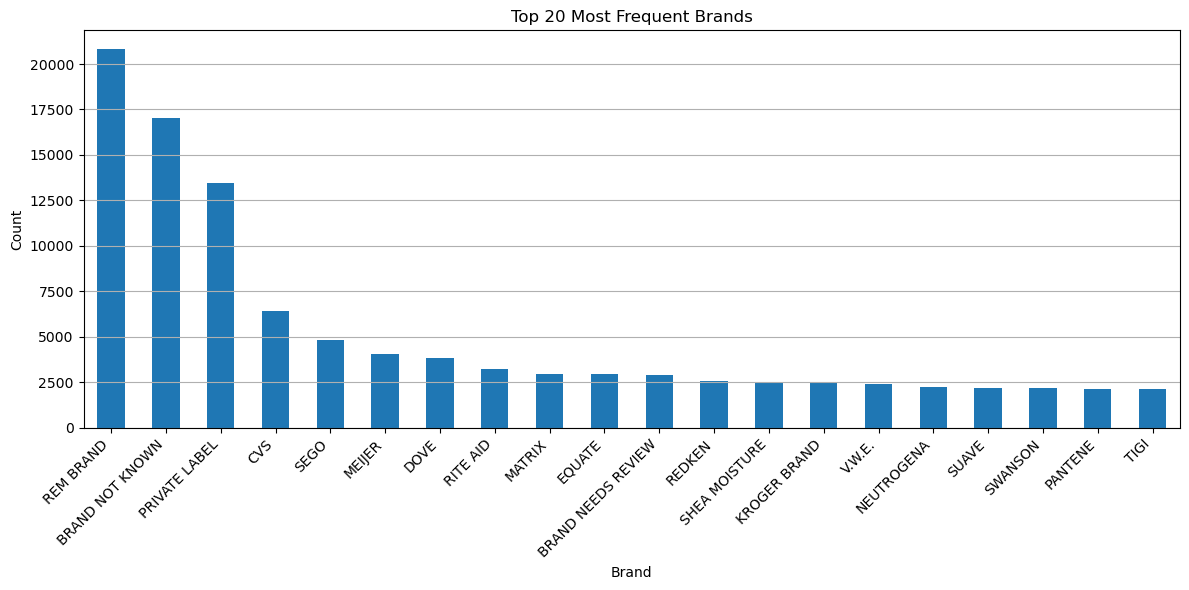

In [25]:
# In addition to 'Brand Not Known', there are other ambiguous brand categories such as 'REM Brand' and 'Private Label'.
# Having such ambiguous brand names among the top 3 brands associated with products will impact the quality of data analysis.
# Need to assess the impact of this when combined with transaction data.
plt.figure(figsize=(12, 6))
top_20_brands.plot(kind='bar')
plt.title('Top 20 Most Frequent Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

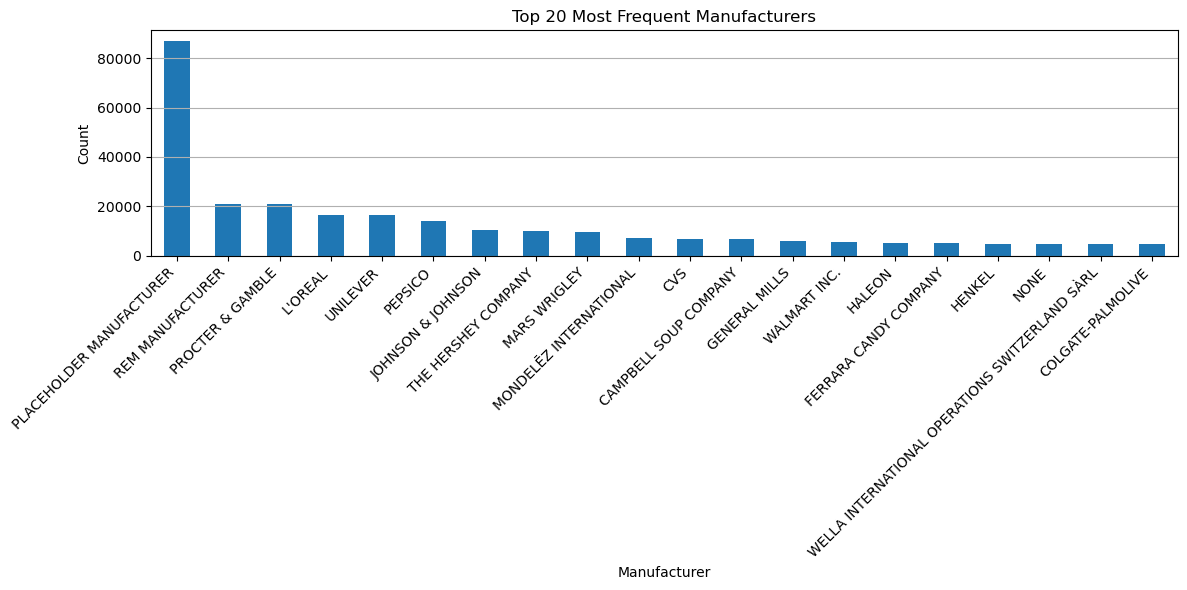

In [26]:
#Similar to Brands, having 'Placeholder Manufaturer' as the top Manufacturer will impact the quality of data analysis.
# Need to assess the impact of this when combined with transaction data.
plt.figure(figsize=(12, 6))
top_20_manufacturers.plot(kind='bar')
plt.title('Top 20 Most Frequent Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [27]:
users = pd.read_csv('USER_TAKEHOME.csv')

In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [29]:
users.head(10)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11.000 Z,1999-10-27 04:00:00.000 Z,NY,en,female
6,651210546816bb4d035b1ead,2023-09-25 22:57:24.000 Z,1983-09-25 22:57:25.000 Z,FL,es-419,male
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18.000 Z,1970-02-16 05:00:00.000 Z,IN,en,female
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25.000 Z,1982-12-22 05:00:00.000 Z,NC,en,female
9,63654b21d02459d8a57a2e2c,2022-11-04 17:25:53.000 Z,1992-05-03 04:00:00.000 Z,NY,en,non_binary


In [30]:
duplicate_rows_U = users[users.duplicated()]

In [31]:
duplicate_rows_U

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER


In [32]:
#Duplicated user ids
duplicate_user_ids = users['ID'][users['ID'].duplicated(keep=False)]

In [33]:
duplicate_user_ids

Series([], Name: ID, dtype: object)

In [34]:
print(users.dtypes)

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object


In [35]:
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], errors='coerce').dt.date

In [36]:
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], errors='coerce')

In [37]:
print(users.dtypes)

ID                           object
CREATED_DATE    datetime64[ns, UTC]
BIRTH_DATE                   object
STATE                        object
LANGUAGE                     object
GENDER                       object
dtype: object


In [38]:
users.head(10)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11+00:00,1999-10-27,NY,en,female
6,651210546816bb4d035b1ead,2023-09-25 22:57:24+00:00,1983-09-25,FL,es-419,male
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18+00:00,1970-02-16,IN,en,female
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25+00:00,1982-12-22,NC,en,female
9,63654b21d02459d8a57a2e2c,2022-11-04 17:25:53+00:00,1992-05-03,NY,en,non_binary


In [39]:
type(users.iloc[2,2])

datetime.date

In [40]:
missing_values_users = users.isnull().sum().to_frame(name='Missing Count')
missing_values_users['Missing Percentage'] = (missing_values_users['Missing Count'] / len(users)) * 100
missing_values_users.round(2)

,Missing Count,Missing Percentage
ID,0,0.00
CREATED_DATE,0,0.00
BIRTH_DATE,3675,3.68
STATE,4812,4.81
LANGUAGE,30508,30.51
GENDER,5892,5.89


In [41]:
txns = pd.read_csv('TRANSACTION_TAKEHOME.csv')

In [42]:
txns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [43]:
txns = txns.drop_duplicates()

In [44]:
txns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      49829 non-null  object 
 1   PURCHASE_DATE   49829 non-null  object 
 2   SCAN_DATE       49829 non-null  object 
 3   STORE_NAME      49829 non-null  object 
 4   USER_ID         49829 non-null  object 
 5   BARCODE         44094 non-null  float64
 6   FINAL_QUANTITY  49829 non-null  object 
 7   FINAL_SALE      49829 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [45]:
txns.head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.00,
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29


In [46]:
txns['BARCODE'] = txns['BARCODE'].apply(
    lambda x: str(int(x)) if pd.notna(x) else None )
txns['BARCODE'] = txns['BARCODE'].apply(
    lambda x: x.zfill(14) if pd.notna(x) else None )

In [47]:
txns.head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,00015300014978,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,None,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,00078742229751,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,00783399746536,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,00047900501183,1.00,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,00681131411295,zero,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,00049200905548,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,00078300069942,zero,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,00052000011227,1.00,
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,None,zero,2.29


In [48]:
txns['FINAL_QUANTITY'].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

In [49]:
txns['FINAL_QUANTITY'] = txns['FINAL_QUANTITY'].replace('zero', '0.0')
txns['FINAL_QUANTITY'] = txns['FINAL_QUANTITY'].astype(float)

In [50]:
txns['FINAL_SALE'].unique()

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

In [51]:
txns['FINAL_SALE'] = txns['FINAL_SALE'].replace(' ', np.nan)
txns['FINAL_SALE'] = txns['FINAL_SALE'].astype(float)

In [52]:
txns.head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,00015300014978,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,None,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,00078742229751,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,00783399746536,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,00047900501183,1.0,NaN
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,00681131411295,0.0,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,00049200905548,1.0,NaN
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,00078300069942,0.0,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,00052000011227,1.0,NaN
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,None,0.0,2.29


In [53]:
txns['PURCHASE_DATE'] = pd.to_datetime(txns['PURCHASE_DATE'], errors='coerce').dt.date
txns['SCAN_DATE'] = pd.to_datetime(txns['SCAN_DATE'], errors='coerce')

In [54]:
txns.head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,00015300014978,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,None,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,00078742229751,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,00783399746536,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,00047900501183,1.0,NaN
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247000+00:00,WALMART,5dcc6c510040a012b8e76924,00681131411295,0.0,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586000+00:00,WALMART,5f850bc9cf9431165f3ac175,00049200905548,1.0,NaN
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902000+00:00,TARGET,6144f4f1f3ef696919f54b5c,00078300069942,0.0,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931000+00:00,WALMART,61a6d926f998e47aad33db66,00052000011227,1.0,NaN
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787000+00:00,ALDI,66686fc2e04f743a096ea808,None,0.0,2.29


In [55]:
txns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49829 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      49829 non-null  object             
 1   PURCHASE_DATE   49829 non-null  object             
 2   SCAN_DATE       49829 non-null  datetime64[ns, UTC]
 3   STORE_NAME      49829 non-null  object             
 4   USER_ID         49829 non-null  object             
 5   BARCODE         44094 non-null  object             
 6   FINAL_QUANTITY  49829 non-null  float64            
 7   FINAL_SALE      37343 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 3.4+ MB


In [56]:
#Check for non digit characters in barcodes, excluding Nan values
non_digit_barcodes_txns = txns.loc[~txns['BARCODE'].isnull()]
non_digit_barcodes_txns.loc[~non_digit_barcodes_txns['BARCODE'].str.isdigit()]


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
169,01cdaa22-a912-496b-8287-87cd9e6b3b1a,2024-07-16,2024-07-17 06:37:09.218000+00:00,CARRS,6160f71f28dab1659e8b5616,-0000000000001,0.0,5.00
6010,3d539304-a2d1-47fd-846e-799cc8d1d15d,2024-07-12,2024-07-16 21:05:18.891000+00:00,DOLLAR TREE STORES INC,6363a9e6d8987029d637d6db,-0000000000001,1.0,NaN
10457,6b9ee775-e895-4133-8b84-fbafbe3bd20d,2024-07-11,2024-07-13 13:22:38.638000+00:00,CVS,63a4ef6bb5f32149b9d86e66,-0000000000001,0.0,3.00
15621,9f624eb5-bd86-44e6-aaf2-b59339b75c85,2024-07-13,2024-07-13 16:56:58.611000+00:00,CVS,62893be61ec71241a98013c3,-0000000000001,0.0,0.46
25312,6b9ee775-e895-4133-8b84-fbafbe3bd20d,2024-07-11,2024-07-13 13:22:38.638000+00:00,CVS,63a4ef6bb5f32149b9d86e66,-0000000000001,1.0,3.00
28894,9f624eb5-bd86-44e6-aaf2-b59339b75c85,2024-07-13,2024-07-13 16:56:58.611000+00:00,CVS,62893be61ec71241a98013c3,-0000000000001,1.0,0.46
42636,3d539304-a2d1-47fd-846e-799cc8d1d15d,2024-07-12,2024-07-16 21:05:18.891000+00:00,DOLLAR TREE STORES INC,6363a9e6d8987029d637d6db,-0000000000001,1.0,1.25
45823,01cdaa22-a912-496b-8287-87cd9e6b3b1a,2024-07-16,2024-07-17 06:37:09.218000+00:00,CARRS,6160f71f28dab1659e8b5616,-0000000000001,1.0,5.00


In [57]:
#Removing values with barcode '-0000000000001'
txns = txns.loc[txns['BARCODE'] != '-0000000000001']

In [58]:
txns.loc[txns['BARCODE'] == '-0000000000001']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE


In [59]:
duplicate_counts = txns.groupby(['RECEIPT_ID', 'PURCHASE_DATE','SCAN_DATE','STORE_NAME','USER_ID','BARCODE']).size().reset_index(name='count')

In [60]:
duplicate_counts

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,count
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,00015300014978,2
1,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,00078742229751,2
2,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,00783399746536,2
3,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,00047900501183,2
4,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247000+00:00,WALMART,5dcc6c510040a012b8e76924,00681131411295,2
...,...,...,...,...,...,...,...
21970,fff60bb7-bf93-4e6b-8055-4d7688da7ead,2024-08-29,2024-08-29 23:47:50.471000+00:00,WALMART,5eb887f71699c213b1abe2e1,00078742213224,2
21971,fff6c6c8-e002-4262-85ea-25849d9721db,2024-08-30,2024-09-06 18:39:03.161000+00:00,WALMART,6220b111e9e82c0c6bc24534,00078742369822,2
21972,fffbb112-3cc5-47c2-b014-08db2f87e0c7,2024-07-30,2024-08-04 11:43:31.474000+00:00,WALMART,5eb59d6be7012d13941af5e2,00818000020115,2
21973,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180000+00:00,WALMART,62a0c8f7d966665570351bb8,00013000009546,2


In [61]:
composite_key = ['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE']
txns_deduped = txns.groupby(composite_key, as_index=False).agg({
    'FINAL_QUANTITY': 'max',
    'FINAL_SALE': 'max'
})

In [62]:

unique_composite_count = txns_deduped[['RECEIPT_ID', 'PURCHASE_DATE','SCAN_DATE','STORE_NAME','USER_ID','BARCODE']].drop_duplicates().shape[0]

print("Number of unique composite keys:", unique_composite_count)

Number of unique composite keys: 21975


In [131]:
#Confirming uniqueness of records in the final df
txns_deduped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21975 entries, 0 to 21974
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      21975 non-null  object             
 1   PURCHASE_DATE   21975 non-null  object             
 2   SCAN_DATE       21975 non-null  datetime64[ns, UTC]
 3   STORE_NAME      21975 non-null  object             
 4   USER_ID         21975 non-null  object             
 5   BARCODE         21975 non-null  object             
 6   FINAL_QUANTITY  21975 non-null  float64            
 7   FINAL_SALE      21975 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 1.3+ MB
